# Classification of players using K-Means

### Problem statement
Using the player attributes, group players into clusters. We can then predict the playing position of a player given their attributes.




### Standard imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from const import *

pd.set_option('display.max_columns', 500) # show all dataframe columns

---------
## Load data

In [2]:
df = pd.read_csv("data/1. processed/data_clean.csv")
df.head()

,player_id,name,age,overall_rating,potential,likes,dislikes,followers,value_clean,wage_clean,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,229558,Dayotchanculle Upamecano,19,77,88,96,5,1190,13000000.0,18000.0,47,39,71,72,21,59,32,28,66,64,73,85,61,67,62,44,86,61,88,24,81,75,35,56,39,68,68,84,75,6,7,8,15,9
1,230767,Renato Júnior Luz Sanches,20,75,84,370,33,3075,10000000.0,41000.0,60,65,64,76,68,77,59,68,70,77,79,77,76,72,90,85,79,86,76,77,90,69,70,67,68,68,73,70,64,5,12,6,13,14
2,237221,Juan Marcos Foyth,20,74,85,44,0,374,8500000.0,40000.0,41,43,74,73,43,68,41,47,53,73,71,71,72,73,72,56,72,65,71,39,61,74,46,52,47,57,73,76,72,8,15,7,14,9
3,228736,Wuilker Faríñez,20,73,87,110,3,572,7500000.0,2000.0,18,19,17,25,15,14,22,18,29,25,49,54,69,65,65,25,75,39,51,20,23,17,15,66,23,45,25,16,21,73,70,69,74,77
4,189509,Thiago Alcântara do Nascimento,27,87,87,109,6,818,51500000.0,140000.0,72,69,54,90,90,90,85,77,87,90,78,69,90,86,86,76,75,75,59,79,56,78,79,86,75,85,67,67,71,6,11,7,9,13


---------------
## Data preparation

For this analysis we just want to use the player attributes for classification

In [14]:
kmeans_df = df[ATTRIBUTES]
kmeans_df.head()

,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,47,39,71,72,21,59,32,28,66,64,73,85,61,67,62,44,86,61,88,24,81,75,35,56,39,68,68,84,75,6,7,8,15,9
1,60,65,64,76,68,77,59,68,70,77,79,77,76,72,90,85,79,86,76,77,90,69,70,67,68,68,73,70,64,5,12,6,13,14
2,41,43,74,73,43,68,41,47,53,73,71,71,72,73,72,56,72,65,71,39,61,74,46,52,47,57,73,76,72,8,15,7,14,9
3,18,19,17,25,15,14,22,18,29,25,49,54,69,65,65,25,75,39,51,20,23,17,15,66,23,45,25,16,21,73,70,69,74,77
4,72,69,54,90,90,90,85,77,87,90,78,69,90,86,86,76,75,75,59,79,56,78,79,86,75,85,67,67,71,6,11,7,9,13


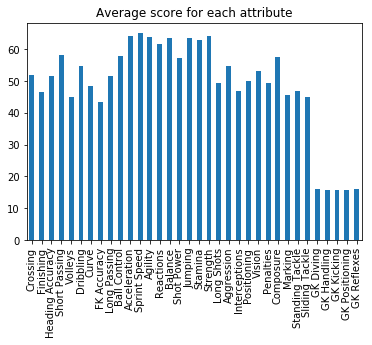

In [15]:
kmeans_df.mean().plot.bar()
plt.title("Average score for each attribute")
plt.show()

The chart above shows that the average score for each attribute is about 50, except for the goal keeping attributes which are much lower. Presumably because there are more outfield players in the sample and tend to have very low goal keeping attribute scores.

The kmeans algorithm works by calculating the (Euclidean)distances datapoints. The algorithm can be biased towards attributes with higher absolute values, therefore we need to normalize the data so no attribute has an exaggerated effect on the overall distance. between For the kmeans algorithm it is important to scale the data before training.

I will use the z-normalisation which scales each column to have a mean of approximately 0 and a standard deviation of approximately 1.

In [16]:
from sklearn.preprocessing import StandardScaler

kmeans_df = kmeans_df.astype('float64')
kmeans_df = scaler.fit_transform(kmeans_df)

In [24]:
kmeans_df = pd.DataFrame(kmeans_df,columns=ATTRIBUTES)
kmeans_df.describe()

,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04,2.100900e+04
mean,-4.926433e-16,2.421349e-15,2.163625e-14,5.161290e-16,-3.711326e-16,2.988648e-15,-3.370409e-16,-3.128788e-16,-7.944787e-16,-3.568747e-15,-2.808454e-15,-1.163237e-15,1.113735e-15,-5.395322e-15,1.127812e-14,-7.075750e-16,1.260264e-14,4.449870e-15,7.529742e-16,-1.083589e-16,1.028875e-15,3.315503e-17,-6.540957e-16,1.437546e-15,-1.458562e-15,-2.302493e-15,-2.607061e-16,1.121003e-15,-7.785565e-16,3.578047e-16,-1.512187e-15,3.915242e-16,-5.853653e-17,8.691383e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.575112e+00,-2.331661e+00,-2.743467e+00,-3.564017e+00,-2.384570e+00,-2.692812e+00,-2.390271e+00,-2.335753e+00,-2.885206e+00,-3.178965e+00,-3.535667e+00,-3.699990e+00,-3.657086e+00,-4.199576e+00,-3.741080e+00,-3.277456e+00,-4.463440e+00,-3.385412e+00,-3.704770e+00,-2.446521e+00,-2.808281e+00,-2.136264e+00,-2.492066e+00,-3.345570e+00,-2.858519e+00,-3.745177e+00,-2.122229e+00,-2.090354e+00,-1.988860e+00,-8.835575e-01,-9.141688e-01,-9.270904e-01,-9.085979e-01,-8.753347e-01
25%,-6.169346e-01,-8.135228e-01,-5.007494e-01,-4.083906e-01,-7.394070e-01,-4.658616e-01,-6.858833e-01,-7.198507e-01,-7.368659e-01,-3.530125e-01,-5.295630e-01,-4.946512e-01,-5.432684e-01,-6.701661e-01,-6.251420e-01,-5.416051e-01,-5.049117e-01,-5.231967e-01,-5.532110e-01,-7.107217e-01,-7.120634e-01,-9.631751e-01,-6.212076e-01,-6.197459e-01,-6.034109e-01,-6.023052e-01,-9.299821e-01,-9.699834e-01,-9.913084e-01,-4.719764e-01,-4.817427e-01,-4.850917e-01,-4.793758e-01,-4.702376e-01
50%,2.782324e-01,1.811192e-01,1.893176e-01,2.630192e-01,5.480989e-02,2.764551e-01,8.384039e-02,-8.503201e-02,2.109314e-01,2.482538e-01,1.892879e-01,2.021616e-01,1.486911e-01,3.571576e-02,9.949485e-02,2.315701e-01,1.160338e-01,1.424348e-01,6.172726e-02,2.360777e-01,1.377544e-01,2.099139e-01,2.622532e-01,1.298558e-01,4.090578e-02,1.048409e-01,1.629108e-01,2.437519e-01,1.962525e-01,-2.955845e-01,-2.964172e-01,-2.956636e-01,-2.954235e-01,-2.966245e-01
75%,7.258159e-01,8.093142e-01,7.068679e-01,6.658650e-01,7.922970e-01,7.006360e-01,7.985838e-01,7.806298e-01,7.796098e-01,6.691403e-01,7.120885e-01,6.899306e-01,7.022587e-01,6.407574e-01,6.792043e-01,7.073702e-01,6.593612e-01,6.749400e-01,6.766655e-01,7.620774e-01,7.609542e-01,8.453372e-01,7.299677e-01,7.431664e-01,7.496541e-01,7.334152e-01,8.583880e-01,8.506195e-01,8.612867e-01,-1.191926e-01,-1.110918e-01,-1.062356e-01,-1.114711e-01,-1.230114e-01
max,2.292358e+00,2.536851e+00,2.432035e+00,2.344389e+00,2.721109e+00,2.238292e+00,2.502972e+00,2.915929e+00,2.612018e+00,2.292560e+00,2.149790e+00,2.153238e+00,2.224570e+00,3.464285e+00,2.345869e+00,2.253721e+00,2.444580e+00,2.272456e+00,2.521480e+00,2.340076e+00,2.347281e+00,2.262820e+00,2.340984e+00,2.787535e+00,2.875899e+00,3.011997e+00,2.398373e+00,2.157719e+00,2.381365e+00,4.349402e+00,4.707370e

The mean and standard deviation of each column are now 0 and 1 respectively

## Kmeans